In [2]:
# !pip install top2vec
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

In [3]:
df = pd.read_csv("/Users/huiwen/Documents/Side Projects/Omdena/omdena-colombia-socialnetwork/Untitled/src/data/task-2-preprocessing/merged_data/Final/Corrected_Final_all.csv", usecols = ["preprocessed_data_without_hashtags"])
df.head()

,preprocessed_data_without_hashtags
0,"['hacer', 'mayo', 'cazar', 'fantasma']"
1,"['despues', 'esperar', 'ancia', 'ahora', 'espe..."
2,"['esperar', 'llegar', 'oido', 'nuevo', 'inicia..."
3,"['menos', 'mes', 'urkullu', 'temer', 'perder',..."
4,"['edicion', 'festival', 'internacional', 'puen..."


In [4]:
doc = df['preprocessed_data_without_hashtags'].values.tolist()

## Train Top2Vec Model

##### Resources used: https://jovian.ai/kamilpolak/top2vec-internet-news-topic-modeling; https://www.kaggle.com/dangelov/covid-19-topic-modeling-and-search-with-top2vec, https://github.com/ddangelov/Top2Vec

#### Parameters:

##### - documents: Input corpus, should be a list of strings.
##### - speed: This parameter will determine how fast the model takes to train. The 'fast-learn' option is the fastest and will generate the lowest quality vectors. The 'learn' option will learn better quality vectors but take a longer time to train. The 'deep-learn' option will learn the best quality vectors but will take significant time to train.
##### - workers: The amount of worker threads to be used in training the model. Larger amount will lead to faster training.

In [5]:
model = Top2Vec(documents=doc, speed="deep-learn", workers=8)

2021-09-12 23:04:52,419 - top2vec - INFO - Pre-processing documents for training
2021-09-12 23:04:53,698 - top2vec - INFO - Creating joint document/word embedding
2021-09-12 23:14:55,031 - top2vec - INFO - Creating lower dimension embedding of documents
2021-09-12 23:15:23,756 - top2vec - INFO - Finding dense areas of documents
2021-09-12 23:15:31,665 - top2vec - INFO - Finding topics


## Explore Top2Vec Discovered Topics

In [7]:
#get the number of topics
model.get_num_topics()

272

In [9]:
#Get Topics
#This will return the topics in decreasing size.
topic_words, word_scores, topic_nums = model.get_topics(272)

In [10]:
#Generate Word Clouds
# for topic in topic_nums[100:105]:
#     model.generate_topic_wordcloud(topic, background_color="black")

In [11]:
#Search Tweets by Topic
#We are going to search by topic 15
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)


In [12]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=15, num_docs=2)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Tweet: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Tweet: 18604, Score: 0.7258003950119019
-----------
['deny', 'political', 'retaliation', 'inform', 'decent', 'people', 'truly']
-----------

Tweet: 21525, Score: 0.7220731973648071
-----------
['tough', 'measure', 'left', 'right', 'latin', 'american', 'country', 'multiple', 'political', 'party', 'amount', 'selfinterest', 'involve', 'well', 'put']
-----------



## Similar Keywords

In [19]:
#Search for similar words to colombia
words, word_scores = model.similar_words(keywords=["colombia"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

hope 0.3970251659853612
issue 0.38574559670094954
group 0.38237059749701163
class 0.3778541442648156
people 0.3774914047857948
point 0.37235624834287256
good 0.3706242264581091
miss 0.3702728467807997
massacre 0.3659400599555402
horrible 0.36430715408681125


In [46]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"], num_topics=5)
topic_nums

array([ 2, 15, 92, 65, 23])

In [47]:
topic_scores 
# topic 2 is the most similar to keyowrd, with cosine similarity of 0.359792

array([0.3597492 , 0.30496089, 0.2996509 , 0.29806383, 0.29590317])

In [49]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"], num_topics=10)
topic_nums

array([  2,  15,  92,  65,  23,  85,  81, 124,  63, 102])

In [50]:
topic_scores 
# topic 2 is the most similar to keyowrd, with cosine similarity of 0.359792

array([0.3597492 , 0.30496089, 0.2996509 , 0.29806383, 0.29590317,
       0.29407003, 0.28727436, 0.27644431, 0.27224724, 0.26855517])

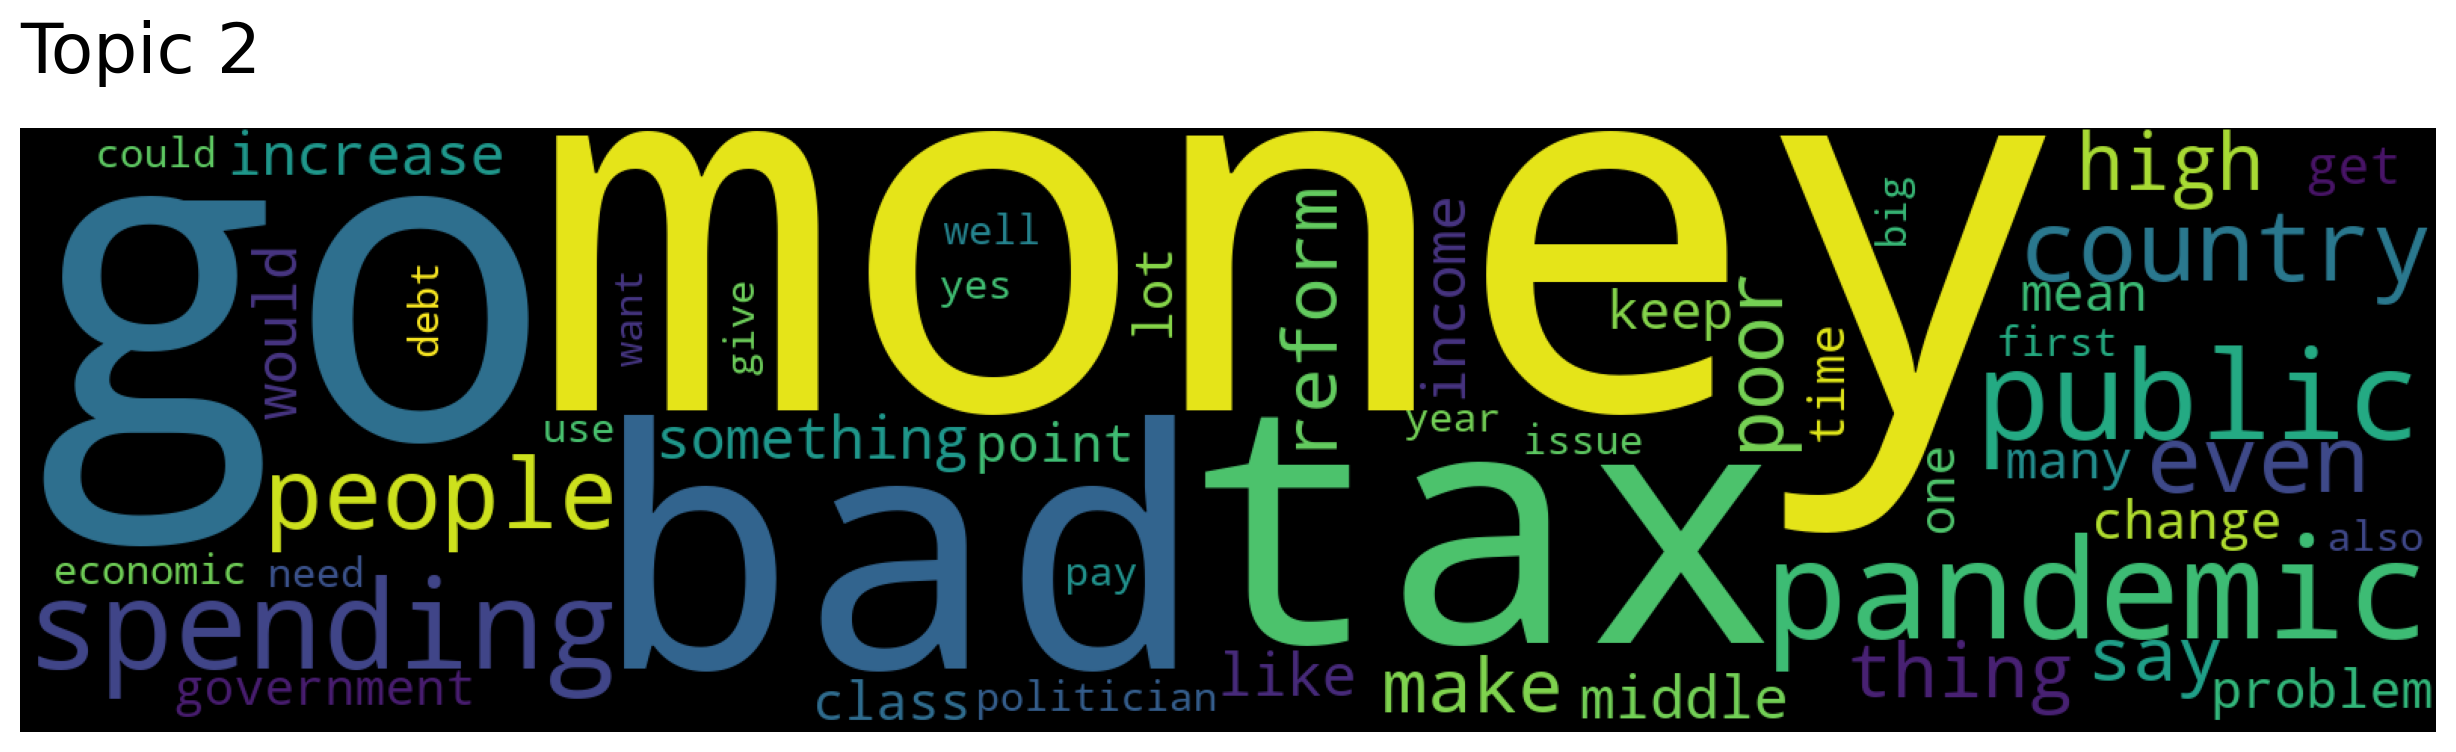

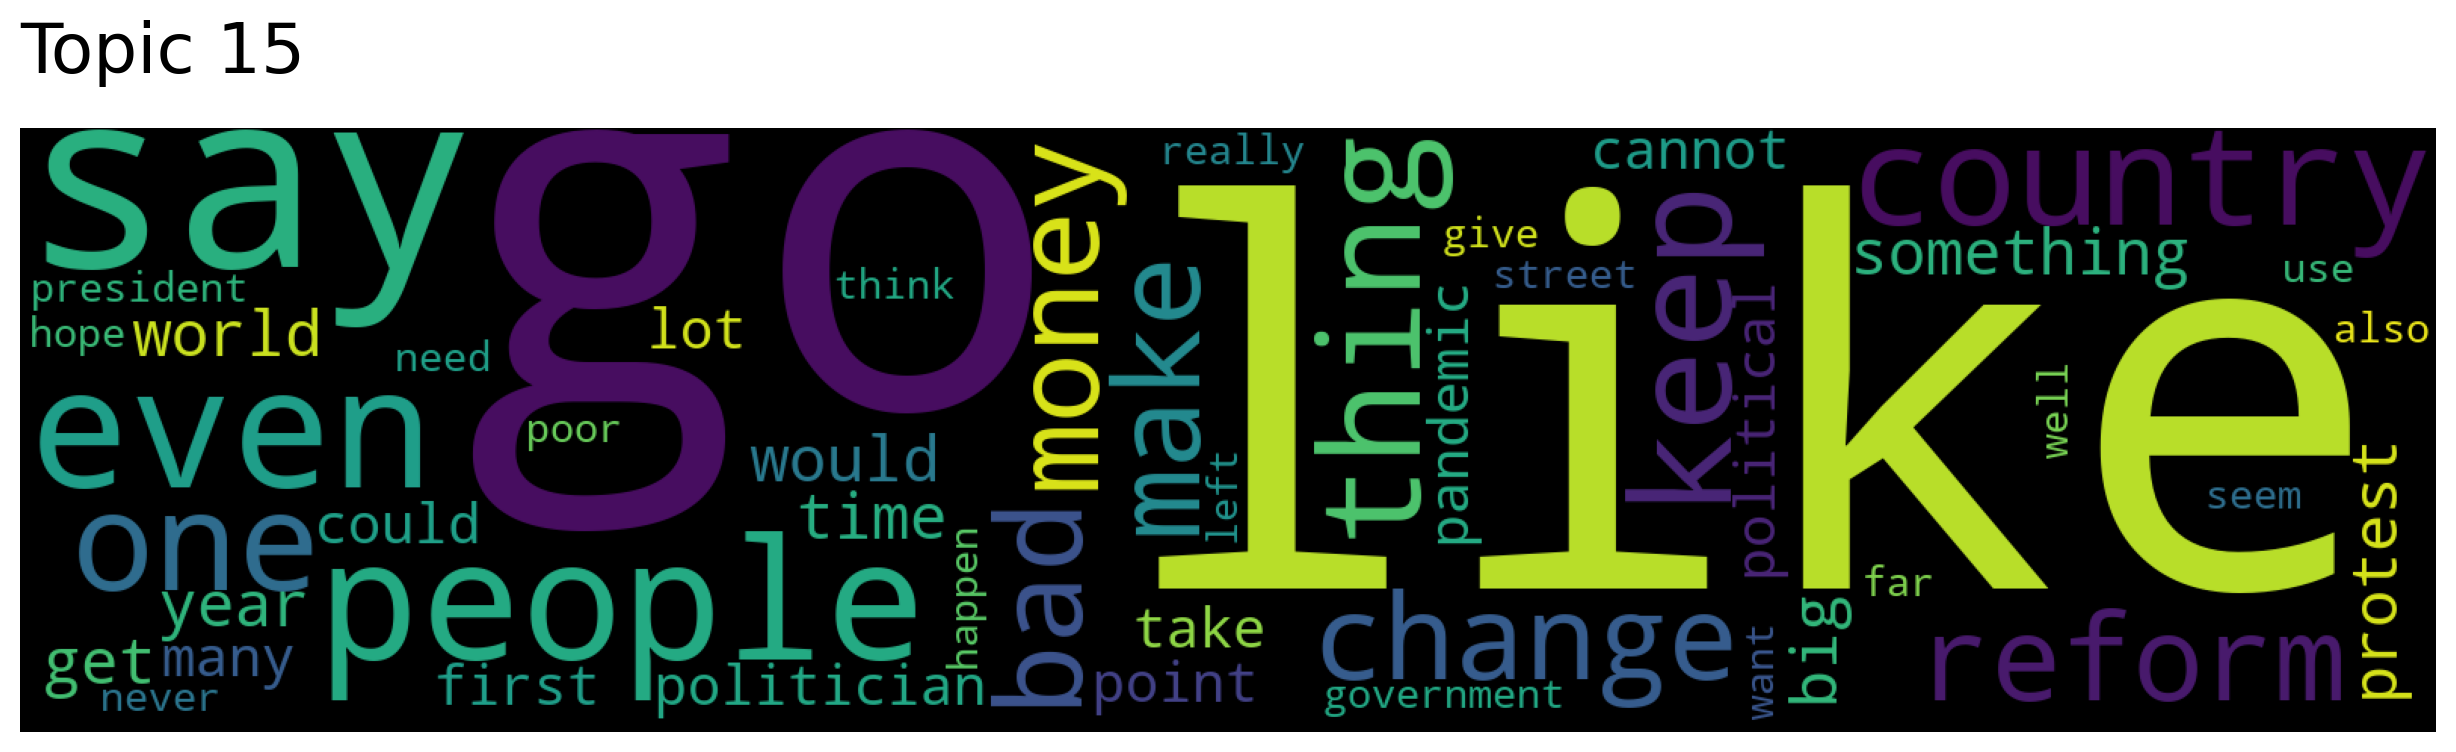

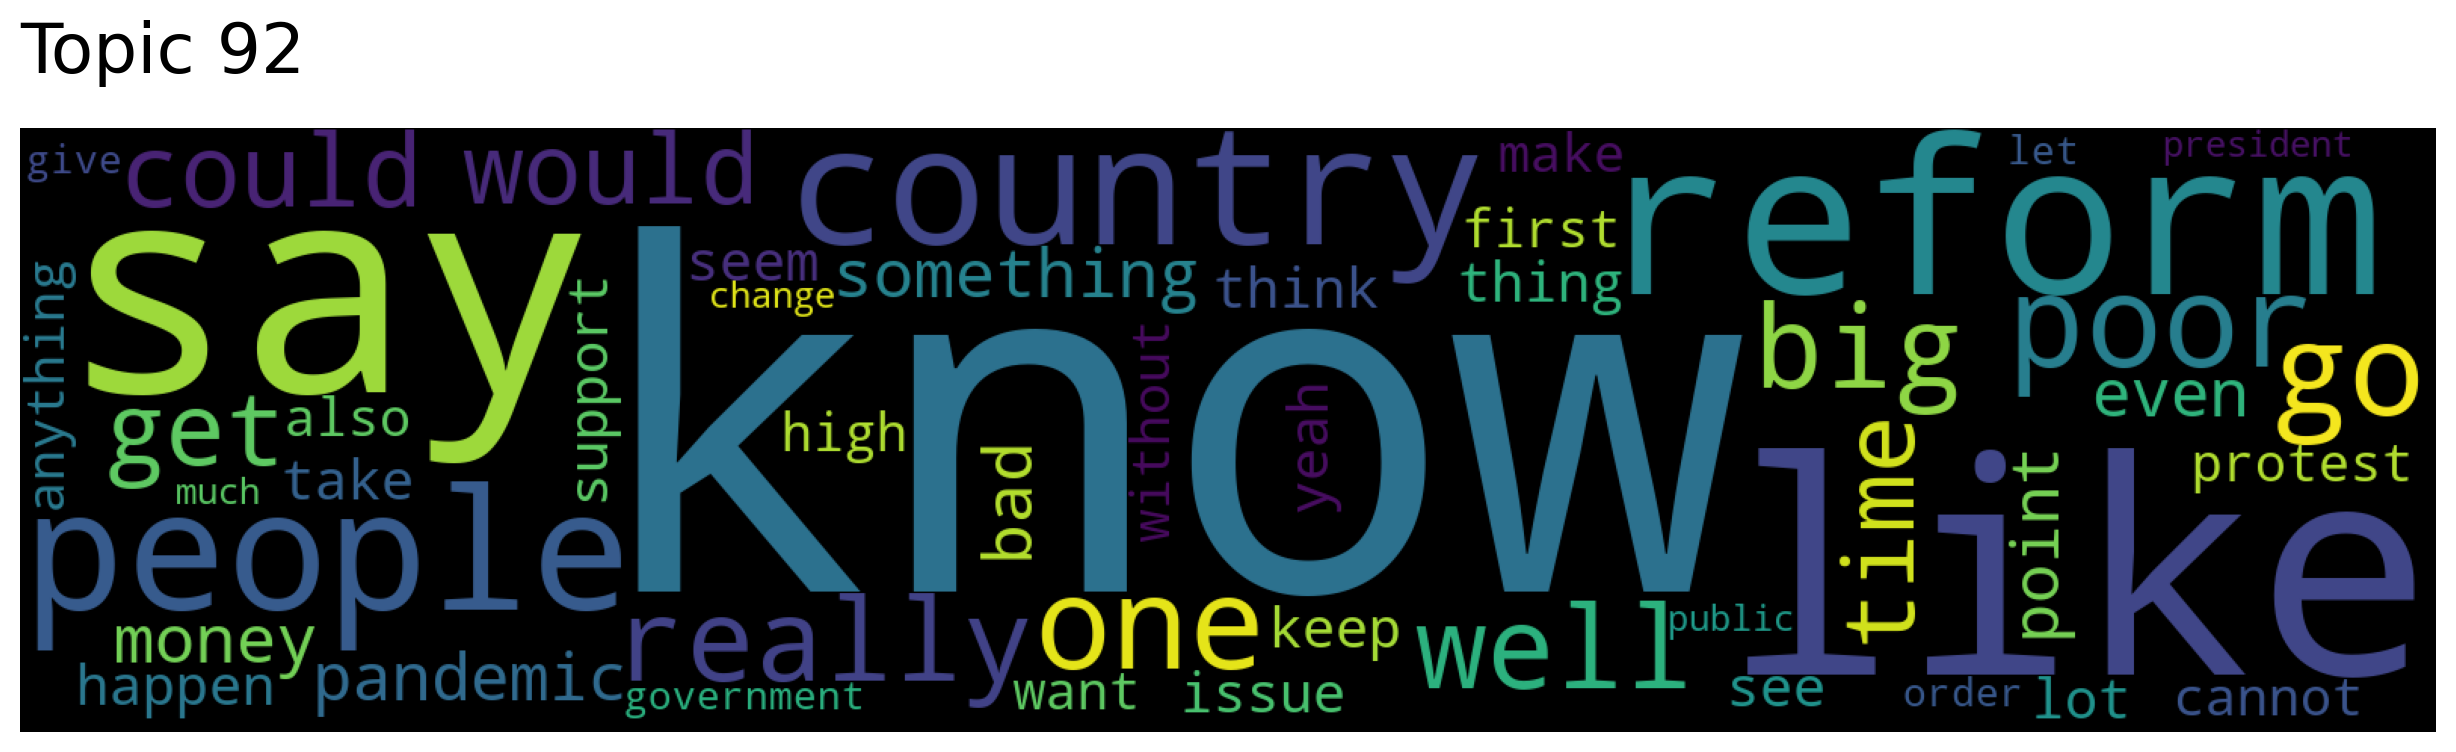

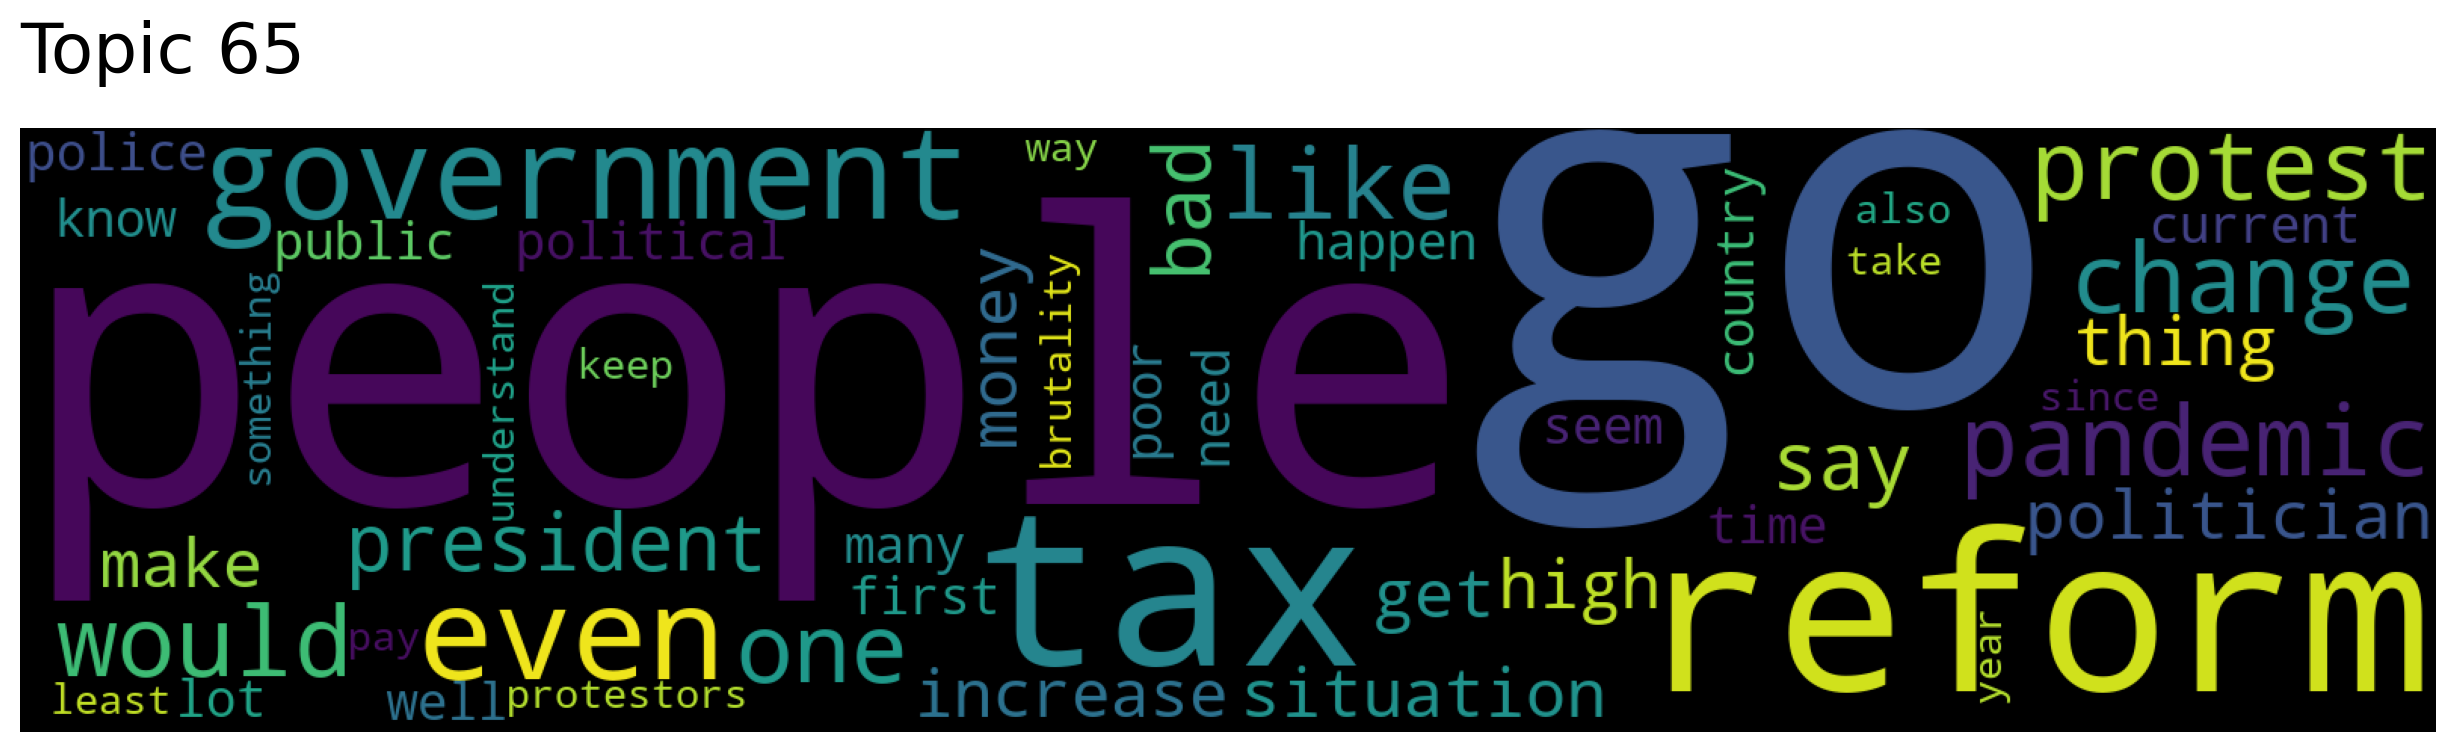

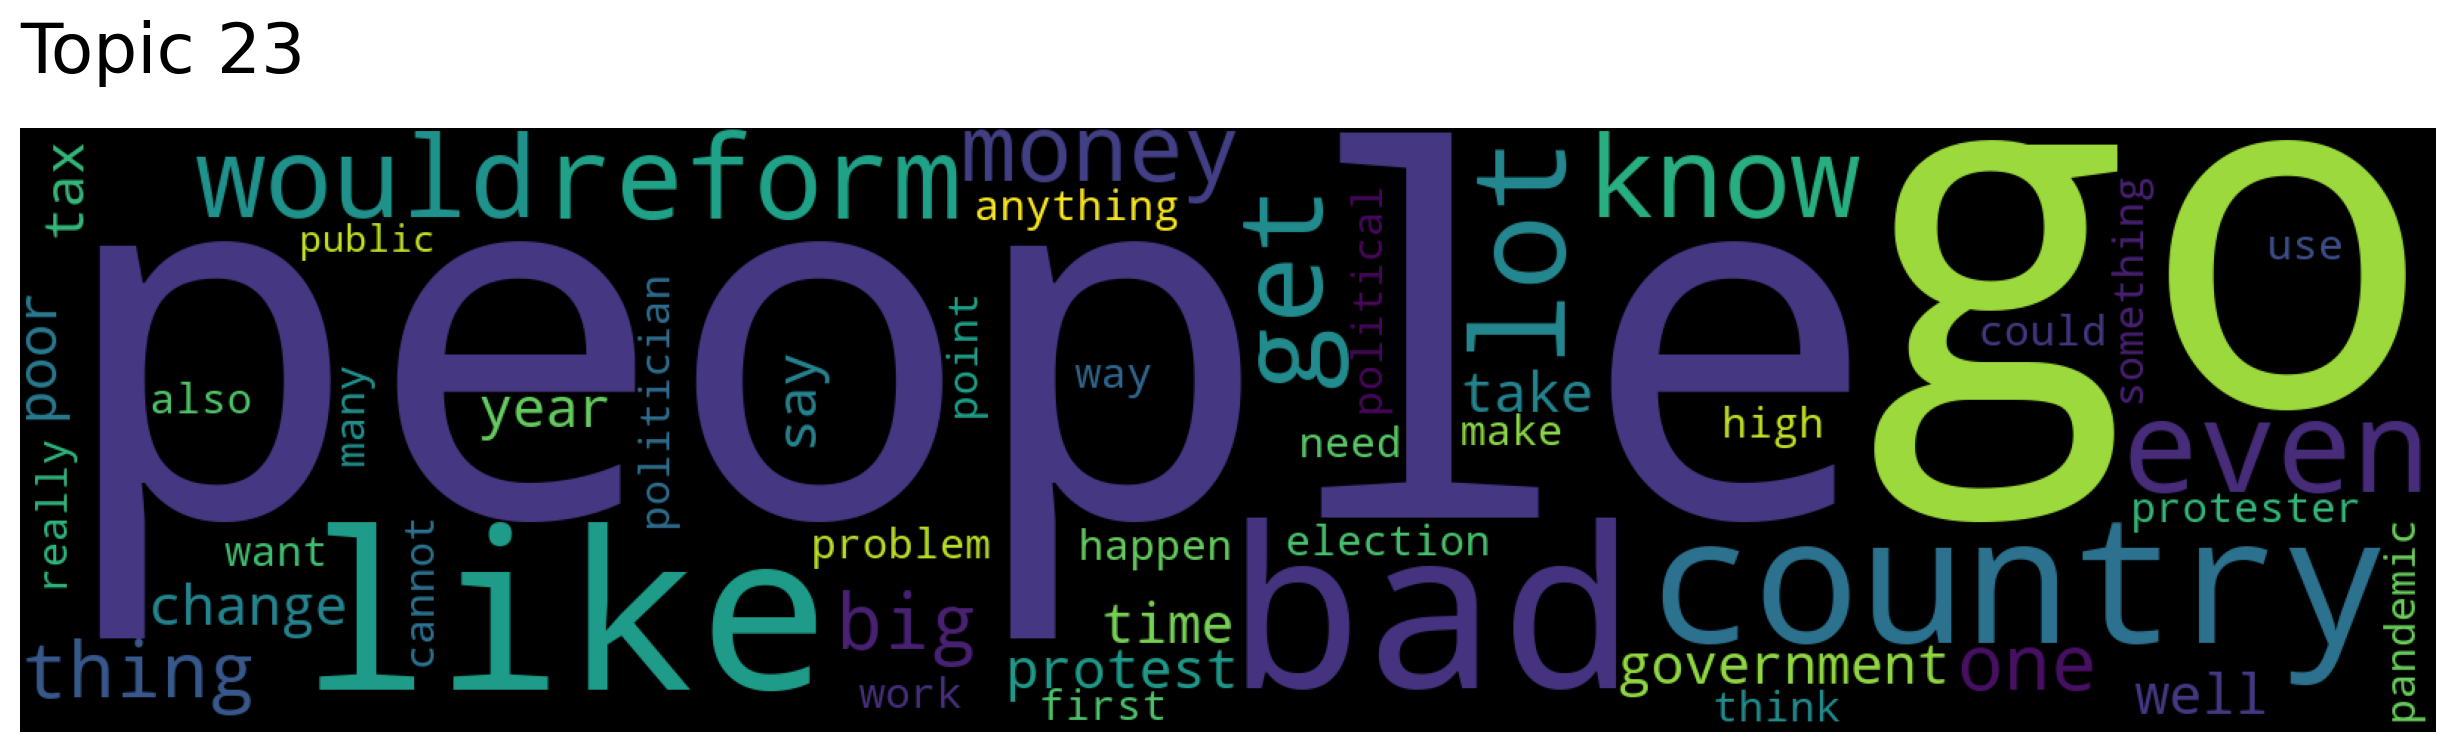

In [45]:
#Discover topics relavant to Colombia - Wordcloud

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["colombia"],num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color="black")

In [38]:
#Search documents by topics

documents, document_scores, document_nums = model.search_documents_by_topic(topic_num=271, num_docs=5)
    
result_df = df.loc[document_nums]
result_df["document_scores"] = document_scores

result_df

for index,row in result_df.iterrows():
    print(f"Document: {index}, Score: {row.document_scores}")
    print("-----------")
    print(f"Section: {row.preprocessed_data_without_hashtags}")
    print("-----------")
    print()

Document: 18328, Score: 0.9945358037948608
-----------
Section: ['colombia', 'noo', 'rt', 'copypage', 'please']
-----------

Document: 18498, Score: 0.9943694472312927
-----------
Section: ['colombia', 'noo', 'rt', 'copypage', 'please']
-----------

Document: 18334, Score: 0.9943215847015381
-----------
Section: ['colombia', 'noo', 'rt', 'copypage', 'please']
-----------

Document: 18331, Score: 0.9943205714225769
-----------
Section: ['colombia', 'noo', 'rt', 'copypage', 'please']
-----------

Document: 18325, Score: 0.9938787221908569
-----------
Section: ['colombia', 'noo', 'rt', 'copypage', 'please']
-----------



In [44]:
#Search documents for content semantically similar to 'columbia' and 'strike'

documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["colombia", "strike"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 21596, Score: 0.4929924011230469
-----------
['answer', 'ill', 'try', 'best', 'iván', 'duque', 'current', 'president', 'colombia', 'elect', 'candidate', 'party', 'long', 'time', 'right', 'wing', 'politician', 'yeah', 'right', 'wing', 'álvaro', 'uribe', 'remember', 'battling', 'hard', 'farc', 'guerrilla', 'report', 'death', 'combat', 'man', 'uribe', 'propose', 'constitutional', 'reform', 'president', 'could', 'elect', 'second', 'time', 'third', 'time', 'latter', 'reform', 'rebut', 'constitutional', 'court', 'deem', 'anti', 'democratic', 'around', 'reform', 'lot', 'complaint', 'corruption', 'time', 'investigation', 'number', 'death', 'period', 'time', 'least', 'time', 'people', 'target', 'combatant', 'young', 'innocent', 'people', 'kill', 'present', 'guerrilla', 'soldier', 'mechanic', 'follow', 'people', 'present', 'job', 'opportunity', 'outside', 'city', 'mainly', 'farm', 'kid', 'military', 'force', 'shot', 'change', 'body', 'outfit', 'present', 'guerrilla', 'soldier', 'body',